In [1]:
# coding=utf-8
from lytools import *  ## pip install lytools==0.0.47

lytools version 0.0.47


In [2]:
class Hydrothermal:

    def __init__(self):
        pass

    def run(self):
        data_path = '../../data/SI_Fig08'
        dataframe_path_lag = join(data_path, 'lag.df')
        dataframe_path_sensitivity = join(data_path, 'sensitivity.df')
        lc_list = [
            'evergreen',
            'deciduous',
            'Shrublands',
            'Grasslands',
        ]
        df_lag = df = Tools().load_df(dataframe_path_lag)
        df_sensitivity = Tools().load_df(dataframe_path_sensitivity)
        for lc in lc_list:
            self.lag(lc,df_lag)
        for lc in lc_list:
            self.sensitivity(lc,df_sensitivity)
        plt.show()

    def __divide_MA(self,arr,min_v=None,max_v=None,step=None,n=None):
        if min_v == None:
            min_v = np.min(arr)
        if max_v == None:
            max_v = np.max(arr)
        if n == None:
            d = np.arange(start=min_v,step=step,stop=max_v)
        if step == None:
            d = np.linspace(min_v,max_v,num=n)

        d_str = []
        for i in d:
            d_str.append('{}'.format(int(round(i, 0))))
        return d,d_str
        pass

    def sensitivity(self,lc,df):
        df = df[df['lc']==lc]
        vals_dic = DIC_and_TIF().void_spatial_dic()
        for i,row in tqdm(df.iterrows(),total=len(df)):
            pix = row.pix
            sens = row.correlation
            vals_dic[pix].append(sens)
        MAT_series = df.MA_TMP
        MAP_series = df.MA_PRE * 12.
        df['MA_PRE'] = MAP_series
        d_mat,mat_str = self.__divide_MA(MAT_series,step=1)
        d_map,map_str = self.__divide_MA(MAP_series,min_v=0,max_v=2001,step=100)

        shuire_matrix = []
        x = []
        y = []
        z = []
        for t in tqdm(list(range(len(d_mat)))):
            if t + 1 >= len(d_mat):
                continue
            df_t = df[df['MA_TMP']>d_mat[t]]
            df_t = df_t[df_t['MA_TMP']<d_mat[t+1]]
            temp = []
            for p in range(len(d_map)):
                if p + 1 >= len(d_map):
                    continue
                df_p = df_t[df_t['MA_PRE']>d_map[p]]
                df_p = df_p[df_p['MA_PRE']<d_map[p+1]]
                pixs = df_p.pix

                if len(pixs) != 0:
                    vals = []
                    for pix in pixs:
                        val = vals_dic[pix]
                        val = np.nanmean(val)
                        vals.append(val)
                    val_mean = np.nanmean(vals)
                else:
                    val_mean = np.nan
                temp.append(val_mean)
                x.append(d_map[p])
                y.append(d_mat[t])
                z.append(val_mean)
            shuire_matrix.append(temp)

        plt.figure(figsize=(4, 6))
        cmap = 'RdBu_r'
        plt.scatter(x, y, c=z, marker='s', cmap=cmap, norm=None,vmin=-0.3,vmax=0.3)
        plt.gca().invert_yaxis()
        plt.subplots_adjust(
            top=0.88,
            bottom=0.11,
            left=0.12,
            right=0.90,
            hspace=0.2,
            wspace=0.2
        )
        plt.title('Lag (months)')
        plt.colorbar()
        plt.xlabel('MAP (mm)')
        plt.ylabel('MAT (°C)')
        plt.title('{} Sensitivity'.format(lc))


    def lag(self,lc,df):
        df = df[df['lc'] == lc]
        vals_dic = DIC_and_TIF().void_spatial_dic()
        for i, row in tqdm(df.iterrows(), total=len(df)):
            pix = row.pix
            sens = row.lag
            vals_dic[pix].append(sens)
        MAT_series = df.MA_TMP
        MAP_series = df.MA_PRE * 12.
        df['MA_PRE'] = MAP_series
        d_mat, mat_str = self.__divide_MA(MAT_series, step=1)
        d_map, map_str = self.__divide_MA(MAP_series, min_v=0, max_v=2001, step=100)

        shuire_matrix = []
        x = []
        y = []
        z = []
        for t in tqdm(list(range(len(d_mat)))):
            if t + 1 >= len(d_mat):
                continue
            df_t = df[df['MA_TMP'] > d_mat[t]]
            df_t = df_t[df_t['MA_TMP'] < d_mat[t + 1]]
            temp = []
            for p in range(len(d_map)):
                if p + 1 >= len(d_map):
                    continue
                df_p = df_t[df_t['MA_PRE'] > d_map[p]]
                df_p = df_p[df_p['MA_PRE'] < d_map[p + 1]]
                pixs = df_p.pix

                if len(pixs) != 0:
                    vals = []
                    for pix in pixs:
                        val = vals_dic[pix]
                        val = np.nanmean(val)
                        vals.append(val)
                    val_mean = np.nanmean(vals)
                else:
                    val_mean = np.nan
                x.append(d_map[p])
                y.append(d_mat[t])
                z.append(val_mean)
                temp.append(val_mean)
            shuire_matrix.append(temp)
        plt.figure(figsize=(4,6))
        cmap = 'RdBu_r'
        plt.scatter(x,y,c=z,marker='s',cmap=cmap, norm=None, vmin=1,vmax=6)
        plt.gca().invert_yaxis()
        plt.subplots_adjust(
            top=0.88,
            bottom=0.11,
            left=0.12,
            right=0.90,
            hspace=0.2,
            wspace=0.2
        )
        plt.title('{} Lag (months)'.format(lc))
        plt.colorbar()
        plt.xlabel('MAP (mm)')
        plt.ylabel('MAT (°C)')


100%|██████████████████████████████████| 13652/13652 [00:00<00:00, 48901.05it/s]
/var/folders/fj/yh639cdx6_d5b2zd5gyqn3mr0000gn/T/ipykernel_3569/381556573.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_PRE'] = MAP_series
  0%|                                                    | 0/35 [00:00<?, ?it/s]/var/folders/fj/yh639cdx6_d5b2zd5gyqn3mr0000gn/T/ipykernel_3569/381556573.py:138: RuntimeWarning: Mean of empty slice
  val = np.nanmean(val)
 29%|████████████▎                              | 10/35 [00:00<00:00, 87.07it/s]/var/folders/fj/yh639cdx6_d5b2zd5gyqn3mr0000gn/T/ipykernel_3569/381556573.py:140: RuntimeWarning: Mean of empty slice
  val_mean = np.nanmean(vals)
100%|██████████████████████████████████| 28767/28767 [00:00<00:00, 5704

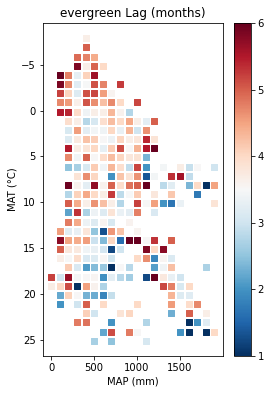

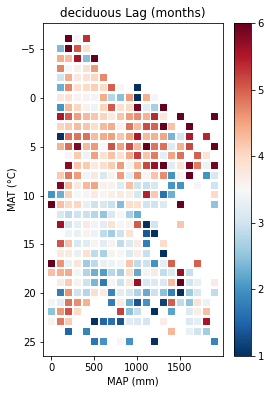

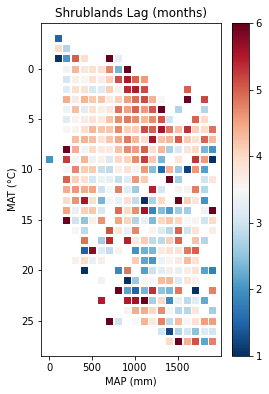

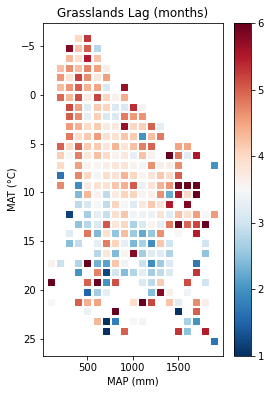

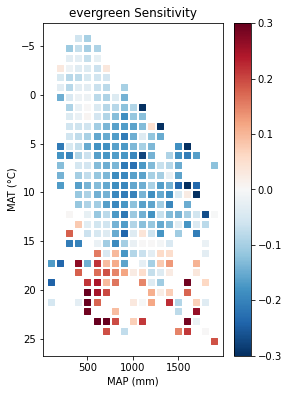

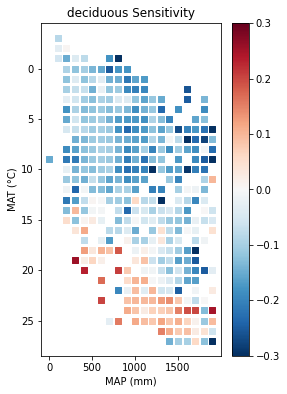

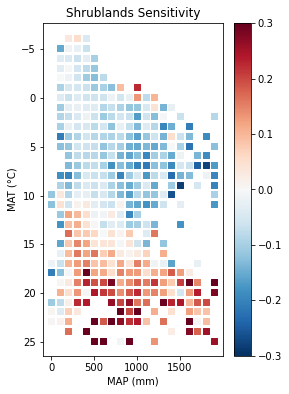

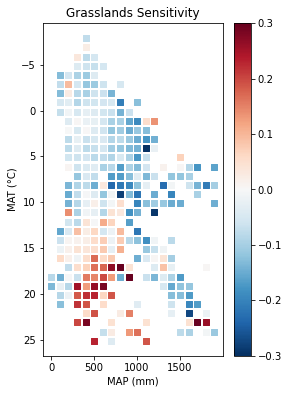

In [3]:
Hydrothermal().run()